# Making and manipulating structures with ASE
For preparing and manipulating crystal structures we will be using the ASE Python library. The documentation is rather accessible and even includes a refresher of Python basics. You can read it here, in preparation for the first lab: https://wiki.fysik.dtu.dk/ase/python.html.
Here we will learn various functionalities of ASE, particularly how to make crystal structures, generate supercells, remove an atom to form a vacancy, and change an atom’s position.

ASE Atoms object holds all the information about our structure and has methods for manipulating it. Once we finish with the structurem, we will export it to a simple Python dictionary that is then used to generate the LAMMPS data and input files.

First we will create a crystal structure of Na metal. For this we will import the necessary spacegroup tools, so that we don't have to manually set up the cell and coordinates. 

In [12]:
from ase.spacegroup import crystal

In [13]:
a = 4.5
Na_unitcell = crystal('Na', [(0,0,0)], spacegroup=229, cellpar=[a, a, a, 90, 90, 90])

In [27]:
print('hello')

hello


Now we verify that our structure indeed has atoms in the right places

In [14]:
Na_unitcell.positions

array([[ 0.  ,  0.  ,  0.  ],
       [ 2.25,  2.25,  2.25]])

In [15]:
Na_unitcell.get_chemical_symbols()

['Na', 'Na']

We can make a supercell of this structure by rescaling the cell. Here we use NumPy's matrix capability.

In [16]:
import numpy
multiplier = numpy.identity(3) * 2
print(multiplier)

[[ 2.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  2.]]


In [17]:
from ase.build import make_supercell
Na_supercell = make_supercell(Na_unitcell, multiplier)
Na_supercell.positions

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.25000000e+00,   2.25000000e+00,   2.25000000e+00],
       [  2.75545530e-16,   2.75545530e-16,   4.50000000e+00],
       [  2.25000000e+00,   2.25000000e+00,   6.75000000e+00],
       [  2.75545530e-16,   4.50000000e+00,   0.00000000e+00],
       [  2.25000000e+00,   6.75000000e+00,   2.25000000e+00],
       [  5.51091060e-16,   4.50000000e+00,   4.50000000e+00],
       [  2.25000000e+00,   6.75000000e+00,   6.75000000e+00],
       [  4.50000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.75000000e+00,   2.25000000e+00,   2.25000000e+00],
       [  4.50000000e+00,   2.75545530e-16,   4.50000000e+00],
       [  6.75000000e+00,   2.25000000e+00,   6.75000000e+00],
       [  4.50000000e+00,   4.50000000e+00,   0.00000000e+00],
       [  6.75000000e+00,   6.75000000e+00,   2.25000000e+00],
       [  4.50000000e+00,   4.50000000e+00,   4.50000000e+00],
       [  6.75000000e+00,   6.75000000e+00,   6.7500000

It is possible to change the position of the first atom directly like this:

In [18]:
Na_supercell.positions[0] = (0.5, 0.5, 0.5)

Similarly, we can change the type of the first atom by reassigning the atomic number

In [19]:
print(Na_supercell.numbers)
Na_supercell.numbers[0] = 3
Na_supercell.get_chemical_symbols()

[11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11]


['Li',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na']

Or we can remove an atom altogether to form a vacancy. We simply use the pop() method of Python lists.

In [20]:
Na_supercell.pop(15)

Atom('Na', [6.75, 6.75, 6.75])

Now let's write the structure to a file so was can visualize what we've done to it. Crystallographic Information File (CIF) format is the most common for periodic structures today, and is understood by most structure visualizers and converters.

In [21]:
from ase.io import write
write('sc.cif', Na_supercell)

We cans use VESTA to look at the result.

To generation a surface slab supercell we can use ASE builder like so, and write it to a file

In [28]:
from ase.build import bcc100
slab = bcc100('Na', size=(2,4,3), vacuum = 10.0)
write('slab.cif', slab)

You can look at the structure in VESTA and also get the atomic positions and cell information

In [23]:
slab.positions

array([[  0.   ,   0.   ,  10.   ],
       [  4.23 ,   0.   ,  10.   ],
       [  0.   ,   4.23 ,  10.   ],
       [  4.23 ,   4.23 ,  10.   ],
       [  0.   ,   8.46 ,  10.   ],
       [  4.23 ,   8.46 ,  10.   ],
       [  0.   ,  12.69 ,  10.   ],
       [  4.23 ,  12.69 ,  10.   ],
       [  2.115,   2.115,  12.115],
       [  6.345,   2.115,  12.115],
       [  2.115,   6.345,  12.115],
       [  6.345,   6.345,  12.115],
       [  2.115,  10.575,  12.115],
       [  6.345,  10.575,  12.115],
       [  2.115,  14.805,  12.115],
       [  6.345,  14.805,  12.115],
       [  0.   ,   0.   ,  14.23 ],
       [  4.23 ,   0.   ,  14.23 ],
       [  0.   ,   4.23 ,  14.23 ],
       [  4.23 ,   4.23 ,  14.23 ],
       [  0.   ,   8.46 ,  14.23 ],
       [  4.23 ,   8.46 ,  14.23 ],
       [  0.   ,  12.69 ,  14.23 ],
       [  4.23 ,  12.69 ,  14.23 ]])

In [29]:
slab.cell

array([[  8.46,   0.  ,   0.  ],
       [  0.  ,  16.92,   0.  ],
       [  0.  ,   0.  ,  24.23]])

In the lab you will need to perform numerical sweeps of several parameters. You can use Numpy

In [25]:
x = numpy.linspace(-5,5,10)
y = x*x
print(x)

[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]


To plot the results, you can use Matplotlib

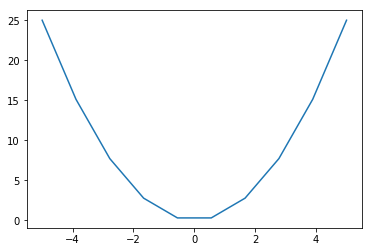

In [30]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()